In [1]:
import pandas as pd

In [2]:
file = './winequality-white.csv'
white_wine = pd.read_csv(file)

맛별 분류 

In [3]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


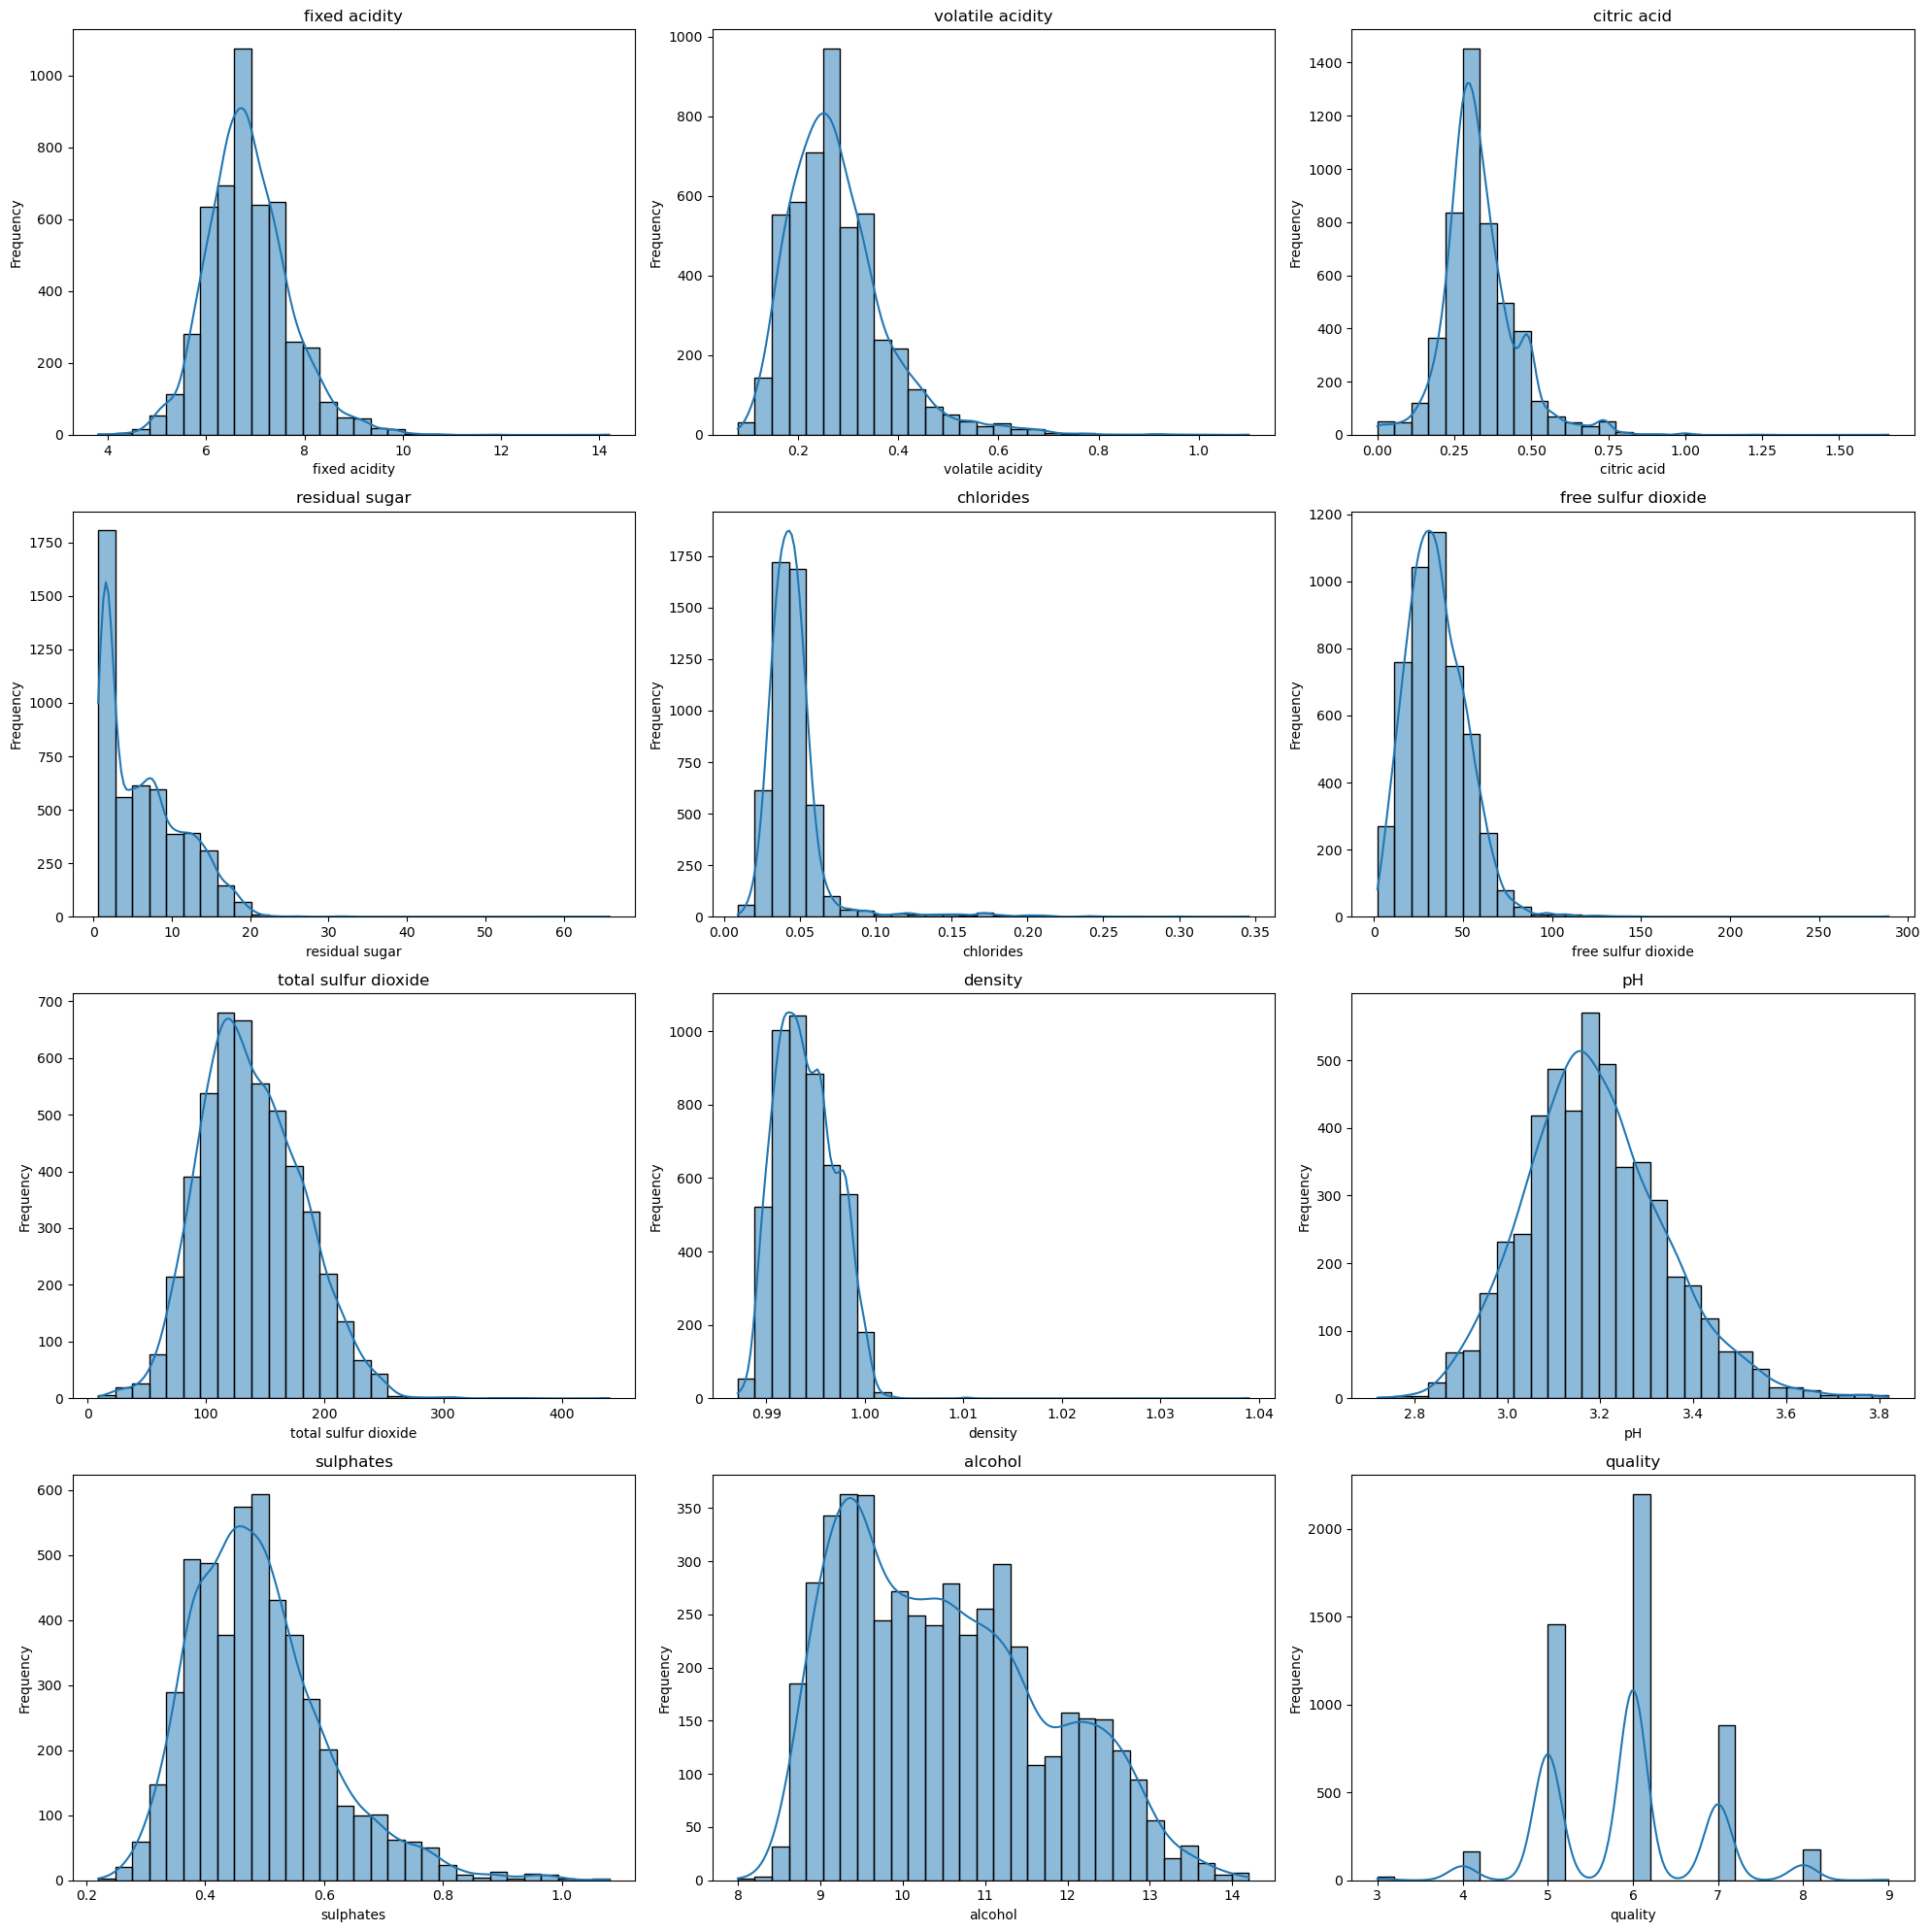

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 특성에 대한 히스토그램 그리기
plt.figure(figsize=(20, 20))
for i, column in enumerate(white_wine.columns):
    plt.subplot(4, 3, i + 1)
    sns.histplot(white_wine[column], bins=30, kde=True)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [5]:
white_wine['taste'] = [1. if grade > 6 else 0. for grade in white_wine['quality']]

In [6]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression  # 로지스틱 회귀
from sklearn.svm import SVC  # 서포트 벡터 머신
from sklearn.neighbors import KNeighborsClassifier  # K-최근접 이웃
from sklearn.naive_bayes import GaussianNB  # 나이브 베이즈
from sklearn.tree import DecisionTreeClassifier  # 결정 트리
from sklearn.ensemble import RandomForestClassifier  # 랜덤 포레스트

from sklearn.metrics import accuracy_score


X = white_wine.drop(['taste','quality'], axis=1)
y = white_wine['taste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱
wine_LR = LogisticRegression()
wine_LR.fit(X_train, y_train)
pre_y_LR = wine_LR.predict(X_test)

# SVC
wine_svc = SVC()
wine_svc.fit(X_train, y_train)
pre_y_svc = wine_svc.predict(X_test)

# KNN
wine_KNN = KNeighborsClassifier(5)
wine_KNN.fit(X_train, y_train)
pre_y_KNN = wine_KNN.predict(X_test)

# NB
wine_NB = GaussianNB()
wine_NB.fit(X_train, y_train)
pre_y_NB = wine_NB.predict(X_test)

# Decision Tree
wine_DT = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_DT.fit(X_train, y_train)
pre_y_tree = wine_DT.predict(X_test)

# Random Forest
wine_rfc = RandomForestClassifier(n_estimators=200)
wine_rfc.fit(X_train, y_train)
pre_y_rfc = wine_rfc.predict(X_test)

# 모델 결정값들 비교
acc_df = pd.DataFrame({'classifier':['LR', 'SVC', 'KNN', 'NB', 'DT', 'RF'],
                       'accuary': [accuracy_score(y_test, pre_y_LR),
                                   accuracy_score(y_test, pre_y_svc),
                                   accuracy_score(y_test, pre_y_KNN),
                                   accuracy_score(y_test, pre_y_NB),
                                   accuracy_score(y_test, pre_y_tree),
                                   accuracy_score(y_test, pre_y_rfc)]})


c:\Users\n6677\anaconda3\envs\wine_ml\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
acc_df

,classifier,accuary
0,LR,0.784694
1,SVC,0.768367
2,KNN,0.775510
3,NB,0.717347
4,DT,0.780612
5,RF,0.888776


In [8]:
# from sklearn.model_selection import GridSearchCV

# # 하이퍼파라미터 그리드 설정
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['sqrt', 'log2', None]
# }

# grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# best_model = grid_search.best_estimator_
# print(grid_search.best_params_)

# '''
# {'max_depth': None, 
#  'max_features': 'sqrt',
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'n_estimators': 300}
# '''

Accuracy: 0.8948980
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       753
         1.0       0.86      0.66      0.74       227

    accuracy                           0.89       980
   macro avg       0.88      0.81      0.84       980
weighted avg       0.89      0.89      0.89       980



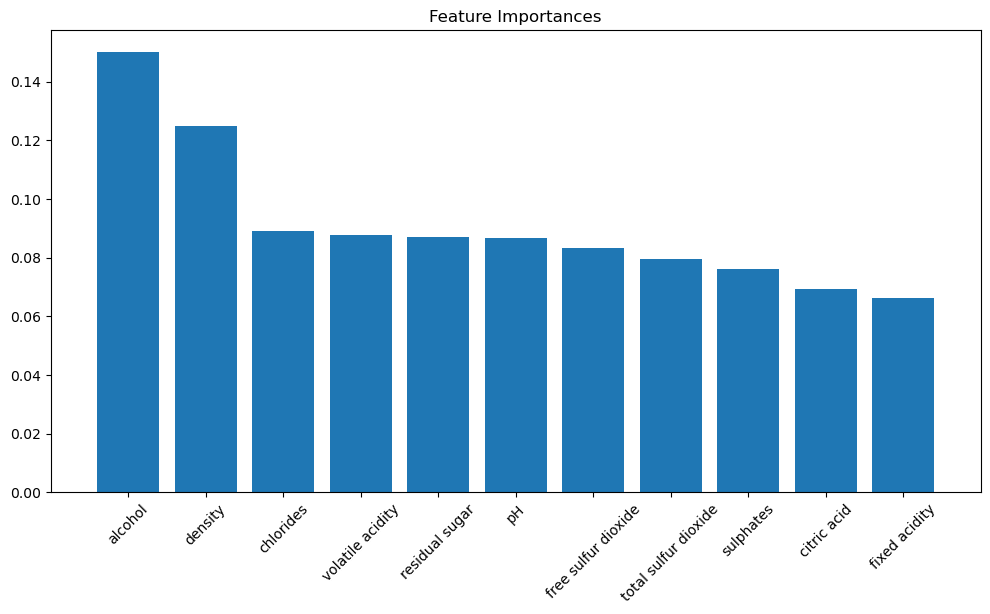

'\nAccuracy: 0.89\n              precision    recall  f1-score   support\n\n         0.0       0.90      0.97      0.93       753\n         1.0       0.86      0.66      0.74       227\n\n    accuracy                           0.89       980\n   macro avg       0.88      0.81      0.84       980\nweighted avg       0.89      0.89      0.89       980\n\n==> 오버 샘플링링\n\n'

In [9]:
# 최적의 파라미터로 재학습

best_model = RandomForestClassifier(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

best_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

# 예측
y_pred = best_model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.7f}')
print(classification_report(y_test, y_pred))


import matplotlib.pyplot as plt
import numpy as np

# 특성 중요도
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# 특성 중요도 시각화
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()

'''
Accuracy: 0.89
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       753
         1.0       0.86      0.66      0.74       227

    accuracy                           0.89       980
   macro avg       0.88      0.81      0.84       980
weighted avg       0.89      0.89      0.89       980

==> 오버 샘플링링

'''

In [10]:
from xgboost import XGBClassifier

# XGBoost 모델 학습
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.7f}')
print(classification_report(y_test, y_pred))

'''
Accuracy: 0.8826531
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93       753
         1.0       0.79      0.67      0.72       227

    accuracy                           0.88       980
   macro avg       0.85      0.81      0.82       980
weighted avg       0.88      0.88      0.88       980
'''

Accuracy: 0.8826531
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93       753
         1.0       0.79      0.67      0.73       227

    accuracy                           0.88       980
   macro avg       0.85      0.81      0.83       980
weighted avg       0.88      0.88      0.88       980



c:\Users\n6677\anaconda3\envs\wine_ml\lib\site-packages\xgboost\training.py:183: UserWarning: [16:52:42] WARNING: D:\bld\xgboost-split_1748292851775\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


'\nAccuracy: 0.8826531\n              precision    recall  f1-score   support\n\n         0.0       0.90      0.95      0.93       753\n         1.0       0.79      0.67      0.72       227\n\n    accuracy                           0.88       980\n   macro avg       0.85      0.81      0.82       980\nweighted avg       0.88      0.88      0.88       980\n'

Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best Model Accuracy: 0.8775510
[0]	validation_0-logloss:0.47333	validation_1-logloss:0.51059
[1]	validation_0-logloss:0.43821	validation_1-logloss:0.48817
[2]	validation_0-logloss:0.40837	validation_1-logloss:0.46737
[3]	validation_0-logloss:0.38378	validation_1-logloss:0.45039
[4]	validation_0-logloss:0.35986	validation_1-logloss:0.43362
[5]	validation_0-logloss:0.34099	validation_1-logloss:0.42164
[6]	validation_0-logloss:0.32292	validation_1-logloss:0.40921
[7]	validation_0-logloss:0.30488	validation_1-logloss:0.39890
[8]	validation_0-logloss:0.29184	validation_1-logloss:0.39029
[9]	validation_0-logloss:0.27835	validation_1-logloss:0.38274
[10]	validation_0-logloss:0.26472	validation_1-logloss:0.37723
[11]	validation_0-logloss:0.25415	validation_1-logloss:0.37181
[12]	validation_0-logloss:0.24431	validation_1-logloss:0.36680
[13]	validation_0-logloss:0.23414	validation_1-logloss:0.36212
[14]	validation_0-l

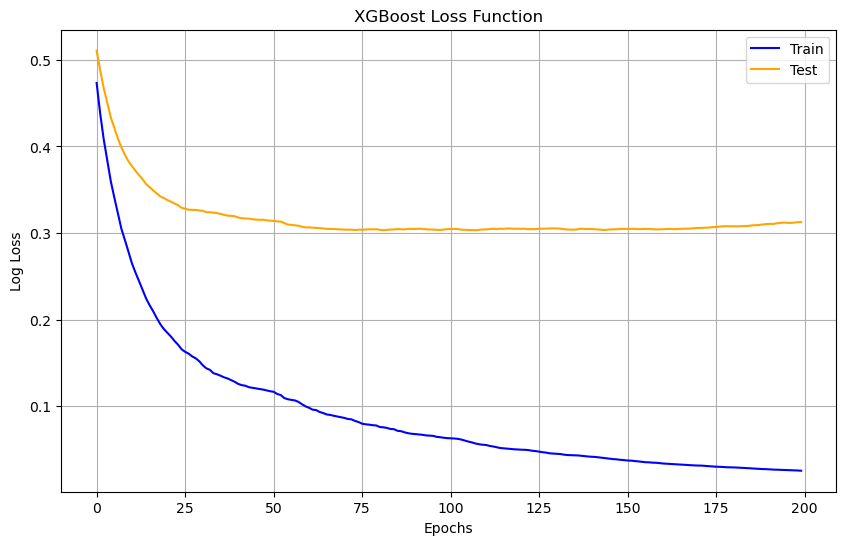

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder



# 레이블 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 데이터셋 분리 (수정!)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# y값 int형 보장
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2]
}

# 분류 문제 타입에 따라 objective 세팅 (이진 분류 기준)
xgb_model = XGBClassifier(eval_metric='logloss', objective='binary:logistic')

# GridSearchCV 설정
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# 하이퍼파라미터 최적화
grid_search.fit(X_train, y_train)

# 최적의 모델과 하이퍼파라미터 출력
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# 최적 모델로 예측
y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f'Best Model Accuracy: {best_accuracy:.7f}')

# 손실 함수 그래프 시각화
best_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)
results = best_model.evals_result()

# 훈련 손실 및 검증 손실 추출
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# 손실 함수 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x_axis, results['validation_0']['logloss'], label='Train', color='blue')
plt.plot(x_axis, results['validation_1']['logloss'], label='Test', color='orange')
plt.legend()
plt.title('XGBoost Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.grid()
plt.show()


In [12]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 개별 모델 정의
model1 = XGBClassifier(eval_metric='mlogloss')
model2 = RandomForestClassifier(random_state=42)
model3 = LogisticRegression()
model4 = DecisionTreeClassifier()

# 보팅 앙상블 모델 생성 (하드 보팅)
voting_model = VotingClassifier(estimators=[
    ('xgb', model1),
    ('lr', model3),
    ('rf', model2),
    ('DT', model4)],
    voting='hard'  # 또는 'soft'로 바꿀 수 있음
)

# 보팅 모델 학습
voting_model.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred_voting = voting_model.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f'Voting Model Accuracy: {voting_accuracy:.7f}')

'''Voting Model Accuracy: 0.8775510'''


c:\Users\n6677\anaconda3\envs\wine_ml\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Model Accuracy: 0.8755102


'Voting Model Accuracy: 0.8775510'

In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Accuracy: 0.9134115
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91       767
         1.0       0.90      0.93      0.92       769

    accuracy                           0.91      1536
   macro avg       0.91      0.91      0.91      1536
weighted avg       0.91      0.91      0.91      1536



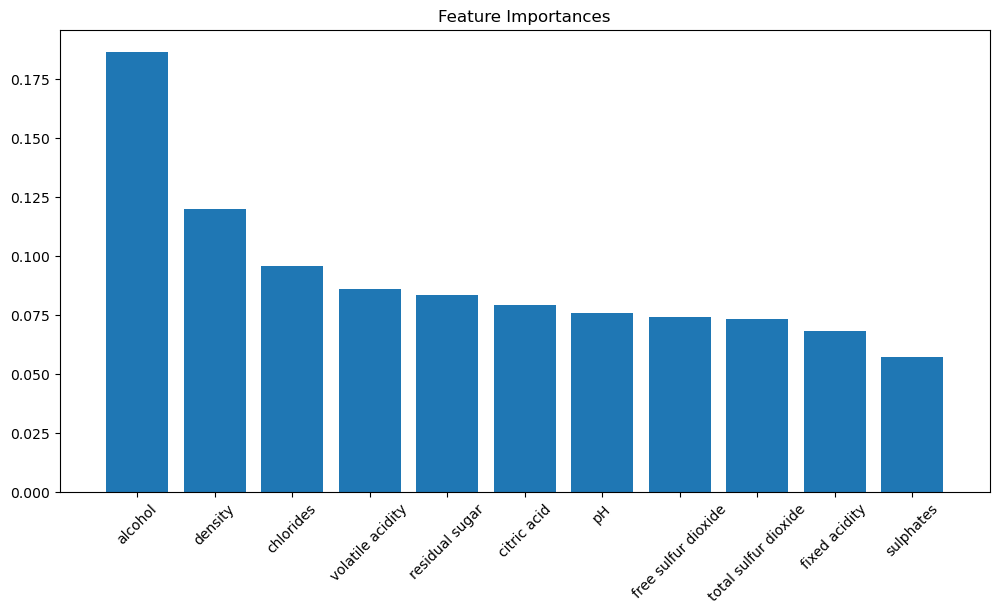

'\nccuracy: 0.9134115\n              precision    recall  f1-score   support\n\n         0.0       0.93      0.90      0.91       767\n         1.0       0.90      0.93      0.92       769\n\n    accuracy                           0.91      1536\n   macro avg       0.91      0.91      0.91      1536\nweighted avg       0.91      0.91      0.91      1536\n'

In [14]:
### SMOTE 이전 GridSearchCV의 파라미터로 실시한 결과
best_model = RandomForestClassifier(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

best_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

# 예측
y_pred = best_model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.7f}')
print(classification_report(y_test, y_pred))


import matplotlib.pyplot as plt
import numpy as np

# 특성 중요도
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# 특성 중요도 시각화
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()

'''
ccuracy: 0.9134115
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91       767
         1.0       0.90      0.93      0.92       769

    accuracy                           0.91      1536
   macro avg       0.91      0.91      0.91      1536
weighted avg       0.91      0.91      0.91      1536
'''

In [15]:
# from sklearn.model_selection import GridSearchCV

# # 하이퍼파라미터 그리드 설정
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['sqrt', 'log2', None]
# }

# grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# best_model = grid_search.best_estimator_
# print(grid_search.best_params_)

# '''{'max_depth': None,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'n_estimators': 200}'''

Accuracy: 0.9160156
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91       767
         1.0       0.90      0.93      0.92       769

    accuracy                           0.92      1536
   macro avg       0.92      0.92      0.92      1536
weighted avg       0.92      0.92      0.92      1536



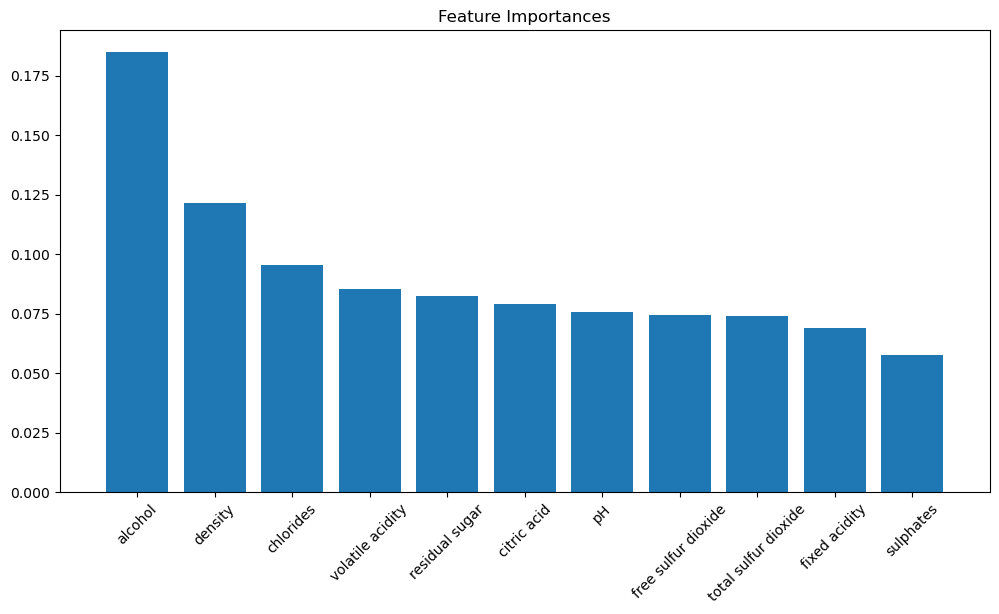

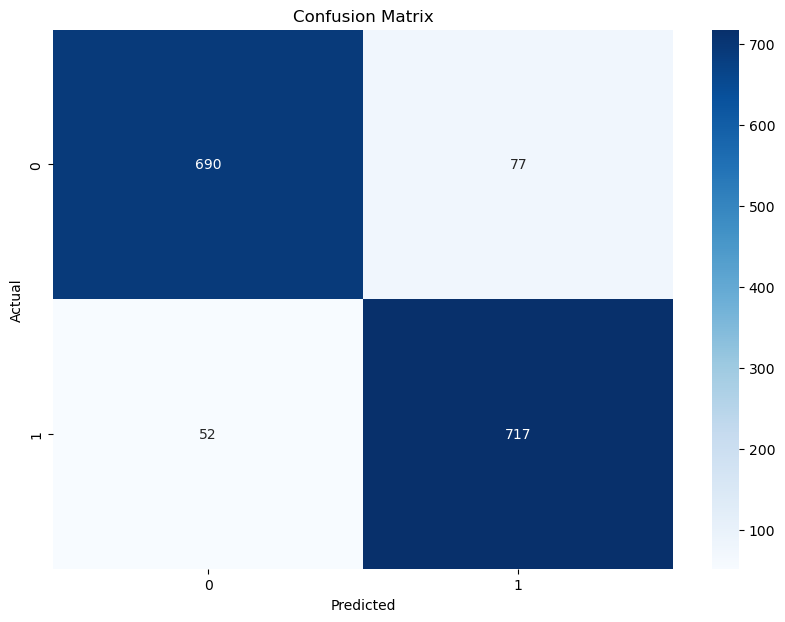

NameError: name 'rf_model' is not defined

In [16]:
### SMOTE 이전 GridSearchCV의 파라미터로 실시한 결과
best_model = RandomForestClassifier(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

best_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

# 예측
y_pred = best_model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.7f}')
print(classification_report(y_test, y_pred))


import matplotlib.pyplot as plt
import numpy as np

# 특성 중요도
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# 특성 중요도 시각화
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 특성 중요도 시각화
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()




In [17]:
# XGBoost 모델 학습
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.7f}')
print(classification_report(y_test, y_pred))




c:\Users\n6677\anaconda3\envs\wine_ml\lib\site-packages\xgboost\training.py:183: UserWarning: [16:55:52] WARNING: D:\bld\xgboost-split_1748292851775\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9121094
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91       767
         1.0       0.90      0.93      0.91       769

    accuracy                           0.91      1536
   macro avg       0.91      0.91      0.91      1536
weighted avg       0.91      0.91      0.91      1536



In [18]:
import joblib

# 모델 저장
joblib.dump(best_model, 'random_forest_model_with_smote.pkl')

['random_forest_model_with_smote.pkl']